In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)


Path to dataset files: /home/arthur/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [4]:
import pandas as pd


In [6]:
books = pd.read_csv(f"{path}/books.csv")

In [8]:
books # analyze relevant information
# clean and standardize data (por pegar uma base de dados muito ampla vem muita coisa que não vamos usar. Ex.: 600 categorias de livros diferentes)
# Além disso, também é importante analyzer se as informações (missing values) que estão a faltar tem algum padrão para evitar enviesamento. Para isso podemos fazer um missingness heat map usando o seaborn

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

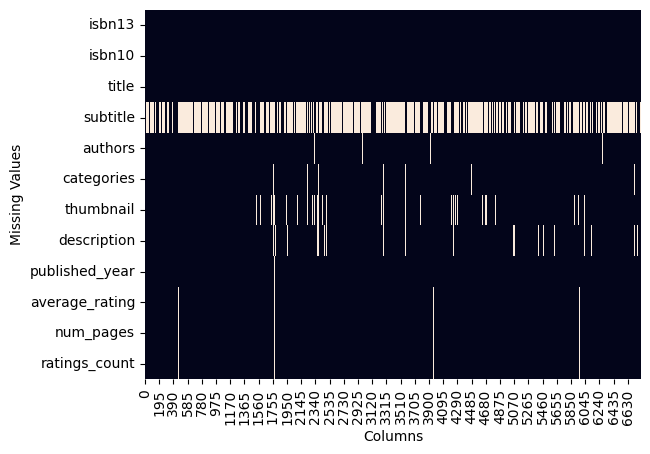

In [13]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(),cbar=False,ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show() # Subtitle is mostly missing;
# avarage_rating, num_pages e ratings_count -> se falta um deles, todos os outros estão a faltar (a clear pattern)
# São Possivelmente de outro dataset que não tem todos os livros que estão no dataset maio (isso poderia causar um enviesamento, talvez por serem livros mais novos ou por apresentarem outra característica)

In [14]:
# Temos que analisar esse padrão porque esses missing values vão ser descartados, e dessa forma pode ser que a aplicação tenha alguma inclinação (recommender will then skew towards certain types of books)
import numpy as np

books["missing_description"] = np.where(books["description"].isna(),1,0) # coloca 1 na coluna dos livros em que a descrição está a faltar, nos que não está a faltar põe 0
books["age_of_book"] = 2025 - books["published_year"]

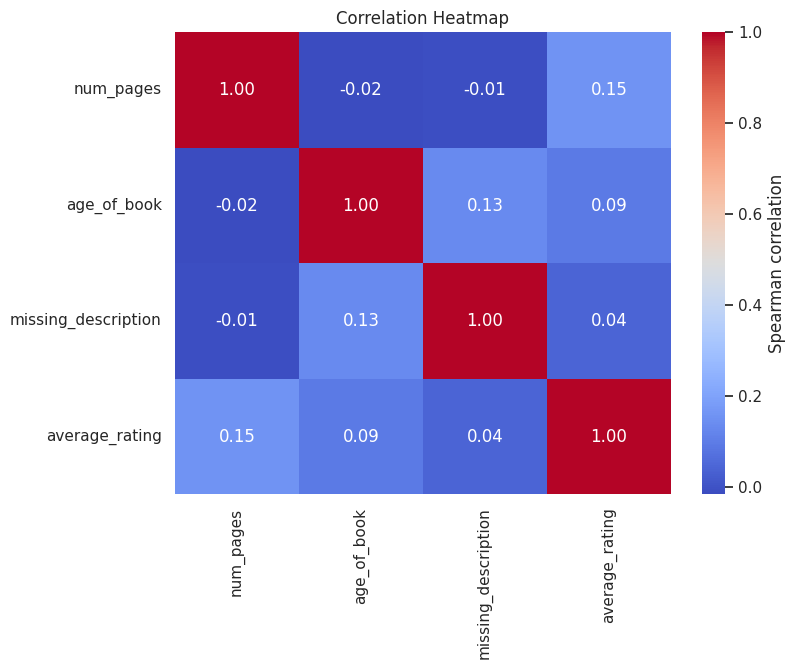

In [15]:
columns_of_interest = ["num_pages","age_of_book","missing_description","average_rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman") #

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation Heatmap")
plt.show()
# Correlation Coefficients
# close to -1 or 1 -> Strong correlation
# closer to 0 -> very weak correlation (there's not really a relationship)
# Para livros sem descrição, o heatmap não revela um padrão claro
# Um padrão significativo poderia indicar que livros sem descrições se inclinam mais para certas características, como serem mais antigos e com poucas páginas, ou mais novos e extensos."

In [22]:
# Metodo: Spearman, pois as variaveis podem nao ter distribuicao normal.

# Observacoes:
# 1. 'missing_description' vs 'age_of_book': Correlacao 0.13, ou seja, quase nula. Nao ha relacao significativa.
# 2. 'average_rating': Tem correlacoes proximas de zero com todas as outras variaveis (0.15, 0.09, 0.04).
#    Isso indica que a avaliacao do livro e independente do seu tamanho, idade ou da falta de descricao.

# Conclusao: As variaveis analisadas nao possuem correlacoes fortes entre si neste dataset.
# Outros fatores, nao incluidos, devem influenciar a avaliacao e as caracteristicas dos livros.

# Obs.: Poderíamos usar web scraping para recuperar a descrição dos livros que estão faltando

# Analisar quantos livros vai nos custar se deleitarmos os sem descrição
# Estão sem algum desses atributos (303x14)
book_missing = books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
]